Using device: cuda


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.94MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.28MB/s]


Epoch 1, Loss: 0.4592353005710838
Epoch 2, Loss: 0.07216959159998998
Epoch 3, Loss: 0.050981607261314385
Epoch 4, Loss: 0.03960791717873944
Epoch 5, Loss: 0.0337535645380226
Epoch 6, Loss: 0.029569967409801497
Epoch 7, Loss: 0.023724138767550713
Epoch 8, Loss: 0.020300041097821967
Epoch 9, Loss: 0.016584145324376062
Epoch 10, Loss: 0.0163693852237537
Epoch 11, Loss: 0.01239709467467743
Epoch 12, Loss: 0.011979840552592224
Epoch 13, Loss: 0.010161601229506455
Epoch 14, Loss: 0.009164755659043611
Epoch 15, Loss: 0.007641225323474104
Epoch 16, Loss: 0.008240923244669527
Epoch 17, Loss: 0.009073154144733543
Epoch 18, Loss: 0.006597434229467866
Epoch 19, Loss: 0.004492928337976448
Epoch 20, Loss: 0.00470324311133461
Accuracy of the network on the 10000 test images: 98.81%


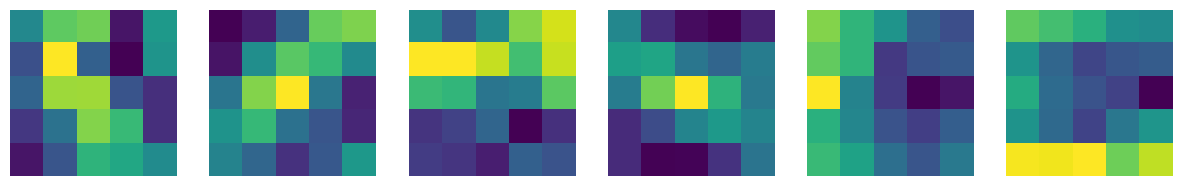

In [ ]:
import torch
import torchvision
import numpy as np

import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Define LeNet model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

# Initialize model, loss function, and optimizer
net = LeNet()

# Move the model to the device
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the model
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

# Plot the learned weight kernels for the first feature layer
weights = net.conv1.weight.data.cpu().numpy()
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(weights[i, 0, :, :], cmap='viridis')
    ax.axis('off')
plt.show()